# DATOS DE LOS PARTICIPANTES 

## Equipo 1 CSF
1. Nicolás Cisneros Palma - A01029883
2. Jorge Martínez Rodríguez - A01351346
3. Leonardo Chico Reyes - A01029882

In [48]:
# Importar librerias importantes
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.colors as mpl_colors
import sys

#paqueteria para ML
from time import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from processing_emisiones import *


In [49]:
df = process_emisiones()

/Users/nicocisneros/Desktop/PERSONAL/TEC/SEXTO SEMESTRE/AI AND DA I/Evidencia_comisiones/processing_emisiones.py:32: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_emision= pd.read_csv(sio_file_emision, encoding = 'utf8', sep = ',', on_bad_lines='warn')


EDAD                      0
COBERTURA                 0
PLAN DE LA POLIZA         0
MODALIDAD DE LA POLIZA    0
MONEDA                    0
ENTIDAD                   0
SEXO                      0
FORMA DE VENTA            0
NUMERO DE ASEGURADOS      0
PRIMA EMITIDA             0
SUMA ASEGURADA            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816498 entries, 0 to 816497
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   EDAD                    816498 non-null  object
 1   COBERTURA               816498 non-null  object
 2   PLAN DE LA POLIZA       816498 non-null  object
 3   MODALIDAD DE LA POLIZA  816498 non-null  object
 4   MONEDA                  816498 non-null  object
 5   ENTIDAD                 816498 non-null  object
 6   SEXO                    816498 non-null  object
 7   FORMA DE VENTA          816498 non-null  object
 8   NUMERO DE ASEGURADOS    816498 no

In [50]:
df.info() #visualizamos los tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816498 entries, 0 to 816497
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   EDAD                    816498 non-null  int64 
 1   COBERTURA               816498 non-null  object
 2   PLAN DE LA POLIZA       816498 non-null  object
 3   MODALIDAD DE LA POLIZA  816498 non-null  object
 4   MONEDA                  816498 non-null  object
 5   ENTIDAD                 816498 non-null  object
 6   SEXO                    816498 non-null  object
 7   FORMA DE VENTA          816498 non-null  object
 8   NUMERO DE ASEGURADOS    816498 non-null  int64 
 9   PRIMA EMITIDA           816498 non-null  int64 
 10  SUMA ASEGURADA          816498 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 68.5+ MB


In [51]:
#CONVERSION A LOS TIPOS DE DATOS NECESARIOS

# Lista de columnas que se necesitan modificar
no_commas_list = df.columns[5:-1]

# Quitamos las comas (,) de las columnas para que no interfieran con el parseamiento
# y las convertimos a su representación numérica en punto flotante
df[no_commas_list] = df[no_commas_list].apply(lambda column: column.replace('[^0-9\.-]', '', regex=True))

df

,EDAD,COBERTURA,PLAN DE LA POLIZA,MODALIDAD DE LA POLIZA,MONEDA,ENTIDAD,SEXO,FORMA DE VENTA,NUMERO DE ASEGURADOS,PRIMA EMITIDA,SUMA ASEGURADA
0,22,Exención de pago de prima,Vitalicio,Tradicional,Extranjera,,,,1,128,0
1,47,Fallecimiento,Vitalicio,Tradicional,Extranjera,,,,6,146947,9432862
2,34,Fallecimiento,Dotal Mixto,Tradicional,Indizada,,,,64,1206118,36899162
3,29,Fallecimiento,Temporal,Tradicional,Nacional,,,,102,38842,13457299
4,54,Sobrevivencia,Dotal Mixto,Tradicional,Extranjera,,,,10,15704,1148046
...,...,...,...,...,...,...,...,...,...,...,...
816493,61,Ahorro / inversión,Temporal,Flexible sin tasa garantizada,Nacional,,,,2,235928,4716901
816494,68,Muerte accidental (Doble indemnización),Temporal,Tradicional,Nacional,,,,10,810,1288479
816495,53,Muerte colectiva (Triple indemnización),Vitalicio,Tradicional,Indizada,,,,1,0,21248
816496,57,Muerte accidental (Doble indemnización),Dotal Puro,Tradicional,Indizada,,,,1,35,69380


In [52]:
df.columns

Index(['EDAD', 'COBERTURA', 'PLAN DE LA POLIZA', 'MODALIDAD DE LA POLIZA',
       'MONEDA', 'ENTIDAD ', 'SEXO', 'FORMA DE VENTA', 'NUMERO DE ASEGURADOS',
       'PRIMA EMITIDA', 'SUMA ASEGURADA'],
      dtype='object')

In [53]:
df['COBERTURA'], cat_COBERTURA = pd.factorize(df['COBERTURA'])
df['PLAN DE LA POLIZA'], cat_Plan = pd.factorize(df['PLAN DE LA POLIZA'])
df['MODALIDAD DE LA POLIZA'], cat_Modalidad = pd.factorize(df['MODALIDAD DE LA POLIZA'])
df['MONEDA'], cat_Moneda = pd.factorize(df['MONEDA'])
df['ENTIDAD '], cat_ENTIDAD = pd.factorize(df['ENTIDAD '])
df['SEXO'], cat_SEXO = pd.factorize(df['SEXO'])
df['FORMA DE VENTA'], cat_Forma = pd.factorize(df['FORMA DE VENTA'])


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816498 entries, 0 to 816497
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   EDAD                    816498 non-null  int64
 1   COBERTURA               816498 non-null  int64
 2   PLAN DE LA POLIZA       816498 non-null  int64
 3   MODALIDAD DE LA POLIZA  816498 non-null  int64
 4   MONEDA                  816498 non-null  int64
 5   ENTIDAD                 816498 non-null  int64
 6   SEXO                    816498 non-null  int64
 7   FORMA DE VENTA          816498 non-null  int64
 8   NUMERO DE ASEGURADOS    816498 non-null  int64
 9   PRIMA EMITIDA           816498 non-null  int64
 10  SUMA ASEGURADA          816498 non-null  int64
dtypes: int64(11)
memory usage: 68.5 MB


# Para la realización de estos clusters, lo que vamos a hacer son dos procesos de clustering; uno en el cual removamos los valores Femeninos y otro en el que removamos los valores Masculino y al final vamos a hacer una comparación visual de ambos.

In [55]:
df.drop(df[(df['SEXO'] == 'Masculino')].index, inplace=True)
df

,EDAD,COBERTURA,PLAN DE LA POLIZA,MODALIDAD DE LA POLIZA,MONEDA,ENTIDAD,SEXO,FORMA DE VENTA,NUMERO DE ASEGURADOS,PRIMA EMITIDA,SUMA ASEGURADA
0,22,0,0,0,0,0,0,0,1,128,0
1,47,1,0,0,0,0,0,0,6,146947,9432862
2,34,1,1,0,1,0,0,0,64,1206118,36899162
3,29,1,2,0,2,0,0,0,102,38842,13457299
4,54,2,1,0,0,0,0,0,10,15704,1148046
...,...,...,...,...,...,...,...,...,...,...,...
816493,61,6,2,1,2,0,0,0,2,235928,4716901
816494,68,9,2,0,2,0,0,0,10,810,1288479
816495,53,3,0,0,1,0,0,0,1,0,21248
816496,57,9,5,0,1,0,0,0,1,35,69380


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816498 entries, 0 to 816497
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   EDAD                    816498 non-null  int64
 1   COBERTURA               816498 non-null  int64
 2   PLAN DE LA POLIZA       816498 non-null  int64
 3   MODALIDAD DE LA POLIZA  816498 non-null  int64
 4   MONEDA                  816498 non-null  int64
 5   ENTIDAD                 816498 non-null  int64
 6   SEXO                    816498 non-null  int64
 7   FORMA DE VENTA          816498 non-null  int64
 8   NUMERO DE ASEGURADOS    816498 non-null  int64
 9   PRIMA EMITIDA           816498 non-null  int64
 10  SUMA ASEGURADA          816498 non-null  int64
dtypes: int64(11)
memory usage: 68.5 MB


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816498 entries, 0 to 816497
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   EDAD                    816498 non-null  int64
 1   COBERTURA               816498 non-null  int64
 2   PLAN DE LA POLIZA       816498 non-null  int64
 3   MODALIDAD DE LA POLIZA  816498 non-null  int64
 4   MONEDA                  816498 non-null  int64
 5   ENTIDAD                 816498 non-null  int64
 6   SEXO                    816498 non-null  int64
 7   FORMA DE VENTA          816498 non-null  int64
 8   NUMERO DE ASEGURADOS    816498 non-null  int64
 9   PRIMA EMITIDA           816498 non-null  int64
 10  SUMA ASEGURADA          816498 non-null  int64
dtypes: int64(11)
memory usage: 68.5 MB


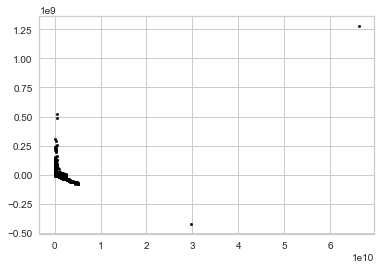

In [58]:
#vamos a reducir la dimensionalidad de estos datos, pues lo usaremos para graficar
pca = PCA(n_components = 2) #solo 2, para poder graficar en el eje X y eje Y
Xshort = pca.fit_transform(df)
plt.scatter(Xshort[:,0], Xshort[:,1], c='black', s=7)
plt.show()

In [59]:
rescaleX = StandardScaler().fit_transform(df)
Xescaled = pd.DataFrame(data = rescaleX, columns = df.columns)
Xescaled

,EDAD,COBERTURA,PLAN DE LA POLIZA,MODALIDAD DE LA POLIZA,MONEDA,ENTIDAD,SEXO,FORMA DE VENTA,NUMERO DE ASEGURADOS,PRIMA EMITIDA,SUMA ASEGURADA
0,-1.43,-1.22,-1.39,-0.61,-1.75,0.00,0.00,0.00,-0.12,-0.06,-0.16
1,0.06,-0.97,-1.39,-0.61,-1.75,0.00,0.00,0.00,-0.11,-0.02,-0.08
2,-0.72,-0.97,-0.30,-0.61,-0.48,0.00,0.00,0.00,0.02,0.28,0.15
3,-1.01,-0.97,0.80,-0.61,0.78,0.00,0.00,0.00,0.10,-0.05,-0.05
4,0.48,-0.72,-0.30,-0.61,-1.75,0.00,0.00,0.00,-0.10,-0.06,-0.15
...,...,...,...,...,...,...,...,...,...,...,...
816493,0.89,0.27,0.80,-0.05,0.78,0.00,0.00,0.00,-0.11,0.00,-0.12
816494,1.31,1.02,0.80,-0.61,0.78,0.00,0.00,0.00,-0.10,-0.06,-0.15
816495,0.42,-0.47,-1.39,-0.61,-0.48,0.00,0.00,0.00,-0.12,-0.06,-0.16
816496,0.66,1.02,4.10,-0.61,-0.48,0.00,0.00,0.00,-0.12,-0.06,-0.16


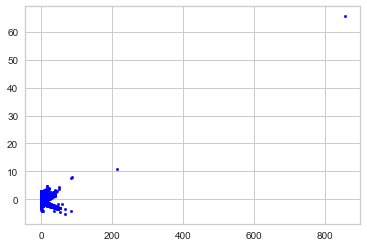

In [60]:
#vamos a reducir la dimensionalidad de estos datos, pues lo usaremos para graficar
pca = PCA(n_components = 2) #solo 2, para poder graficar en el eje X y eje Y
Xescaled_short1 = pca.fit_transform(Xescaled)
plt.scatter(Xescaled_short1[:,0], Xescaled_short1[:,1], c='blue', s=7)
plt.show()

In [61]:
#n_clusters: número de gruos a serem creados
#n_init: número de repeticiones del algoritmo
K = 5
kmeans_gral = KMeans(n_clusters=K, random_state=0, n_init=50).fit(Xescaled)
kmeans_gral.labels_ #grupos a los cuales cada elemeto 


array([0, 0, 0, ..., 0, 2, 0], dtype=int32)

In [62]:
kmeans_gral.cluster_centers_

array([[ 5.81082476e-03, -2.29372998e-02, -8.09567904e-01,
        -2.36168273e-01, -5.88103775e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -2.58597464e-02,
         1.96425761e-03,  5.58848166e-03],
       [-3.57542887e-01, -1.13263425e-01,  2.78233434e-01,
         2.36452351e+00, -1.85641241e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.06452597e-02,
        -3.89687685e-02, -3.51266390e-02],
       [ 9.01614772e-02,  5.26702226e-02,  7.13559616e-01,
        -4.03088183e-01,  6.22145619e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  4.19645412e-03,
         6.23842933e-03, -3.40361923e-03],
       [-2.80253161e+00, -7.24703330e-01,  5.19758612e+00,
         5.02175307e+00,  2.04296334e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.78747442e+02,
         7.01069736e+02,  5.69268920e+02],
       [-8.12081935e-02,  2.46860068e-02,  8.51620783e-01,
        -5.47449463e-01,  7.93557876e-01,  0.00000000e+00,
  

In [63]:
pca = PCA(n_components = 2) #solo 2, para poder graficar en el eje X y eje Y
Xcenters = pca.fit_transform(kmeans_gral.cluster_centers_)
Xcenters

array([[-187.76853343,  -13.89945744],
       [-187.80466219,  -13.93240159],
       [-187.75582503,  -13.83150957],
       [ 732.78759059,   -0.84586931],
       [-169.45856994,   42.50923791]])

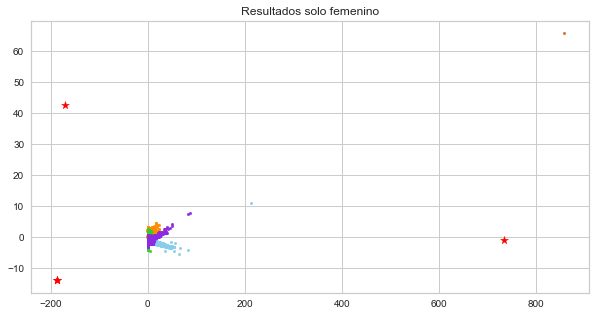

In [64]:
#vamos a visualizar los resultados

colors = ['darkorange', 'limegreen', 'blueviolet', 'chocolate', 'skyblue', 'tab:pink', 'tab:orange'] #ver más en: https://matplotlib.org/stable/gallery/color/named_colors.html
fig, ax = plt.subplots(figsize=(10, 5))

#graficamos los datos, cada uno con un color diferente representando un cluster
for i in range(K):
  points = np.array([Xescaled_short1[j] for j in range (len(Xescaled_short1)) if kmeans_gral.labels_[j] == i]) 
  ax.scatter(points[:,0], points[:,1], s=7, c = colors[i])

#graficamos los centros de los clusters
ax.scatter(Xcenters[:,0], Xcenters[:,1], marker='*',s=70, c='red')

plt.title("Resultados solo femenino")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


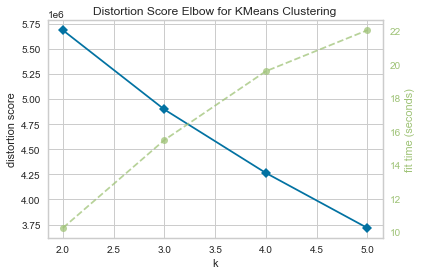

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
#usar el metodo Elbow para determinar el mejor K

visualizer = KElbowVisualizer(kmeans_gral, k=(2,6))

visualizer.fit(Xescaled)        
visualizer.show()        

In [66]:
df.drop(df[(df['SEXO'] == 'Femenino')].index, inplace=True)
df

,EDAD,COBERTURA,PLAN DE LA POLIZA,MODALIDAD DE LA POLIZA,MONEDA,ENTIDAD,SEXO,FORMA DE VENTA,NUMERO DE ASEGURADOS,PRIMA EMITIDA,SUMA ASEGURADA
0,22,0,0,0,0,0,0,0,1,128,0
1,47,1,0,0,0,0,0,0,6,146947,9432862
2,34,1,1,0,1,0,0,0,64,1206118,36899162
3,29,1,2,0,2,0,0,0,102,38842,13457299
4,54,2,1,0,0,0,0,0,10,15704,1148046
...,...,...,...,...,...,...,...,...,...,...,...
816493,61,6,2,1,2,0,0,0,2,235928,4716901
816494,68,9,2,0,2,0,0,0,10,810,1288479
816495,53,3,0,0,1,0,0,0,1,0,21248
816496,57,9,5,0,1,0,0,0,1,35,69380


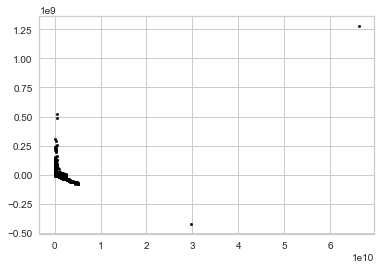

In [67]:
#vamos a reducir la dimensionalidad de estos datos, pues lo usaremos para graficar
pca = PCA(n_components = 2) #solo 2, para poder graficar en el eje X y eje Y
Xshort = pca.fit_transform(df)
plt.scatter(Xshort[:,0], Xshort[:,1], c='black', s=7)
plt.show()

In [68]:
rescaleX = StandardScaler().fit_transform(df)
Xescaled = pd.DataFrame(data = rescaleX, columns = df.columns)
Xescaled

,EDAD,COBERTURA,PLAN DE LA POLIZA,MODALIDAD DE LA POLIZA,MONEDA,ENTIDAD,SEXO,FORMA DE VENTA,NUMERO DE ASEGURADOS,PRIMA EMITIDA,SUMA ASEGURADA
0,-1.43,-1.22,-1.39,-0.61,-1.75,0.00,0.00,0.00,-0.12,-0.06,-0.16
1,0.06,-0.97,-1.39,-0.61,-1.75,0.00,0.00,0.00,-0.11,-0.02,-0.08
2,-0.72,-0.97,-0.30,-0.61,-0.48,0.00,0.00,0.00,0.02,0.28,0.15
3,-1.01,-0.97,0.80,-0.61,0.78,0.00,0.00,0.00,0.10,-0.05,-0.05
4,0.48,-0.72,-0.30,-0.61,-1.75,0.00,0.00,0.00,-0.10,-0.06,-0.15
...,...,...,...,...,...,...,...,...,...,...,...
816493,0.89,0.27,0.80,-0.05,0.78,0.00,0.00,0.00,-0.11,0.00,-0.12
816494,1.31,1.02,0.80,-0.61,0.78,0.00,0.00,0.00,-0.10,-0.06,-0.15
816495,0.42,-0.47,-1.39,-0.61,-0.48,0.00,0.00,0.00,-0.12,-0.06,-0.16
816496,0.66,1.02,4.10,-0.61,-0.48,0.00,0.00,0.00,-0.12,-0.06,-0.16


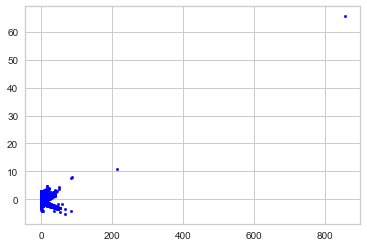

In [69]:
#vamos a reducir la dimensionalidad de estos datos, pues lo usaremos para graficar
pca = PCA(n_components = 2) #solo 2, para poder graficar en el eje X y eje Y
Xescaled_short = pca.fit_transform(Xescaled)
plt.scatter(Xescaled_short[:,0], Xescaled_short[:,1], c='blue', s=7)
plt.show()

In [70]:
K = 5
kmeans_gral = KMeans(n_clusters=K, random_state=0, n_init=50).fit(Xescaled)
kmeans_gral.labels_ #grupos a los cuales cada elemeto

array([0, 0, 0, ..., 0, 2, 0], dtype=int32)

In [71]:
kmeans_gral.cluster_centers_

array([[ 5.81082476e-03, -2.29372998e-02, -8.09567904e-01,
        -2.36168273e-01, -5.88103775e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -2.58597464e-02,
         1.96425761e-03,  5.58848166e-03],
       [-3.57542887e-01, -1.13263425e-01,  2.78233434e-01,
         2.36452351e+00, -1.85641241e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.06452597e-02,
        -3.89687685e-02, -3.51266390e-02],
       [ 9.01614772e-02,  5.26702226e-02,  7.13559616e-01,
        -4.03088183e-01,  6.22145619e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  4.19645412e-03,
         6.23842933e-03, -3.40361923e-03],
       [-2.80253161e+00, -7.24703330e-01,  5.19758612e+00,
         5.02175307e+00,  2.04296334e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.78747442e+02,
         7.01069736e+02,  5.69268920e+02],
       [-8.12081935e-02,  2.46860068e-02,  8.51620783e-01,
        -5.47449463e-01,  7.93557876e-01,  0.00000000e+00,
  

In [72]:
pca = PCA(n_components = 2) #solo 2, para poder graficar en el eje X y eje Y
Xcenters = pca.fit_transform(kmeans_gral.cluster_centers_)
Xcenters

array([[-187.76853343,  -13.89945744],
       [-187.80466219,  -13.93240159],
       [-187.75582503,  -13.83150957],
       [ 732.78759059,   -0.84586931],
       [-169.45856994,   42.50923791]])

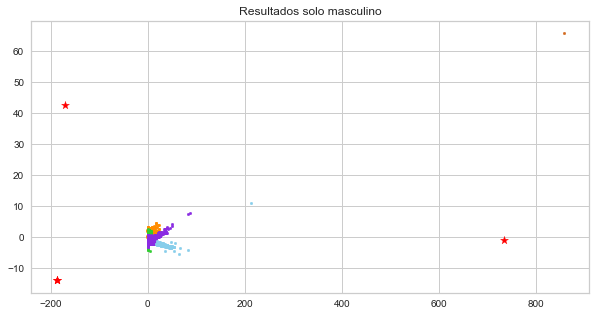

In [73]:
#vamos a visualizar los resultados

colors = ['darkorange', 'limegreen', 'blueviolet', 'chocolate', 'skyblue', 'tab:pink', 'tab:orange'] #ver más en: https://matplotlib.org/stable/gallery/color/named_colors.html
fig, ax = plt.subplots(figsize=(10, 5))

#graficamos los datos, cada uno con un color diferente representando un cluster
for i in range(K):
  points = np.array([Xescaled_short[j] for j in range (len(Xescaled_short)) if kmeans_gral.labels_[j] == i]) 
  ax.scatter(points[:,0], points[:,1], s=7, c = colors[i])

#graficamos los centros de los clusters
ax.scatter(Xcenters[:,0], Xcenters[:,1], marker='*',s=70, c='red')

plt.title("Resultados solo masculino")
plt.show()

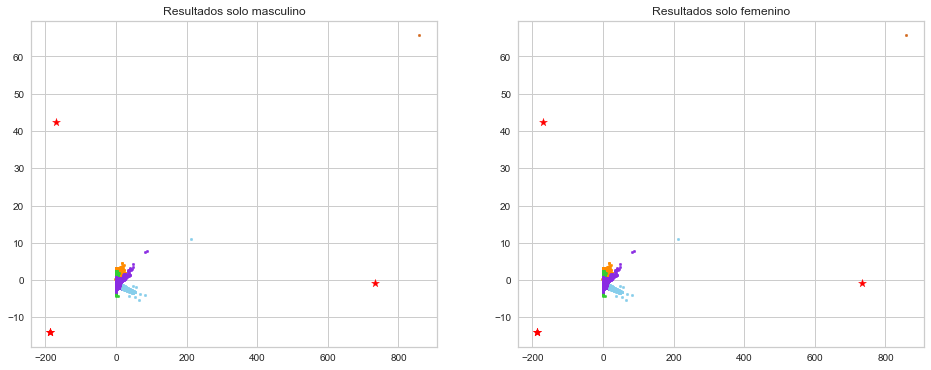

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Graficar los resultados solo masculino en el primer subplot
ax1.set_title("Resultados solo masculino")
for i in range(K):
    points = np.array([Xescaled_short[j] for j in range(len(Xescaled_short)) if kmeans_gral.labels_[j] == i])
    ax1.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax1.scatter(Xcenters[:, 0], Xcenters[:, 1], marker='*', s=70, c='red')

# Graficar los resultados solo femenino en el segundo subplot
ax2.set_title("Resultados solo femenino")
for i in range(K):
    points = np.array([Xescaled_short1[j] for j in range(len(Xescaled_short1)) if kmeans_gral.labels_[j] == i])
    ax2.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax2.scatter(Xcenters[:, 0], Xcenters[:, 1], marker='*', s=70, c='red')

# Mostrar la figura
plt.show()

# Observaciones sobre ambos clusters
1. No existe mayor diferenciación entre ambas gráficas que sean visibles a la percepción visual, por lo que podemos incluir que el género no es un factor que afecte el clustering.
2. El siguiente paso sería hacer esta mismo diferenciación pero ahora utilizando otras variables 

# Observaciones generales de utilizar PCA
1. Reducción de dimensionalidad: El PCA reduce la dimensionalidad del conjunto de datos original al proyectarlo en un espacio de menor dimensión. Esto permite visualizar y analizar los datos de manera más efectiva.

2. Varianza explicada: Cada componente principal en PCA representa una combinación lineal de las variables originales. La varianza explicada por cada componente principal indica cuánta información se conserva al proyectar los datos en ese eje.

3. Distancia entre puntos: Los clusters formados en el espacio de menor dimensión indican grupos de puntos que tienen características similares. La distancia entre los puntos dentro de un cluster y la distancia entre los clusters pueden proporcionar información sobre la similitud o la diferencia entre los grupos.

4. Interpretación de componentes: Los componentes principales pueden interpretarse como direcciones en el espacio original de las variables originales. Los coeficientes de los componentes principales indican la contribución relativa de cada variable original en la formación del componente principal. Esto puede ayudar a identificar las características más relevantes o significativas para cada cluster.

# Observaciones particulares de utilizar PCA
1. Pérdida de información: El PCA puede haber reducido la dimensionalidad del conjunto de datos pero al mismo tiempo puede haber perdido información crucial para la formación de clusters distintos. Esto puede ocurrir cuando los componentes principales no son capaces de capturar la variabilidad suficiente en los datos o cuando la variabilidad no está bien representada en las primeras componentes principales.

2. Baja variabilidad entre observaciones: Es posible que las observaciones en el conjunto de datos sean muy similares entre sí en todas las dimensiones consideradas. Si las diferencias o variaciones entre las observaciones son mínimas, puede resultar difícil encontrar una estructura clara de clusters después de aplicar PCA.

3. Interacciones complejas: Si las relaciones entre las variables originales son altamente no lineales o si existen interacciones complejas entre las variables, el PCA puede no ser capaz de capturar esas relaciones de manera efectiva. Esto puede resultar en clusters poco distintos o en la formación de un único cluster.

4. Dimensionalidad insuficiente: La dimensionalidad reducida después de aplicar PCA puede no ser suficiente para capturar la estructura de los datos de manera adecuada. En algunos casos, es posible que se necesite una mayor cantidad de componentes principales para obtener clusters significativos y distinguibles.